Import Library

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('R:\CODING\DATA SCIENCE\Scrapping\Scrapping Google finance\google_finance.csv', encoding='utf-8')
print(df.head(5))
print(df.columns)


           name price date volume
0  KLSE: VITROX   NaN  NaN    NaN
1  KLSE: VITROX   NaN  NaN    NaN
2  KLSE: VITROX   NaN  NaN    NaN
3  KLSE: VITROX   NaN  NaN    NaN
4  KLSE: VITROX   NaN  NaN    NaN
Index(['name', 'price', 'date', 'volume'], dtype='object')


<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ACER\AppData\Local\Temp\ipykernel_19556\2060748536.py:6: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('R:\CODING\DATA SCIENCE\Scrapping\Scrapping Google finance\google_finance.csv', encoding='utf-8')


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4550 non-null   object
 1   price   4401 non-null   object
 2   date    4401 non-null   object
 3   volume  4401 non-null   object
dtypes: object(4)
memory usage: 142.3+ KB


In [168]:
df.describe()

,name,price,date,volume
count,4550,4401,4401,4401
unique,7,638,283,482
top,KLSE: VITROX,MYR RM0.30,"Apr 18, 2025",13M
freq,650,51,149,107


EDA

In [169]:
df.isnull().sum()

name        0
price     149
date      149
volume    149
dtype: int64

In [170]:
null_data = df[df.isnull().any(axis=1)]
null_data

,name,price,date,volume
0,KLSE: VITROX,NaN,NaN,NaN
1,KLSE: VITROX,NaN,NaN,NaN
2,KLSE: VITROX,NaN,NaN,NaN
3,KLSE: VITROX,NaN,NaN,NaN
4,KLSE: VITROX,NaN,NaN,NaN
...,...,...,...,...
3917,KLSE: GREATEC,NaN,NaN,NaN
3918,KLSE: GREATEC,NaN,NaN,NaN
3919,KLSE: GREATEC,NaN,NaN,NaN
3920,KLSE: GREATEC,NaN,NaN,NaN


In [171]:
df.duplicated().sum()

np.int64(2730)

In [172]:
df_duplicates = df[df.duplicated()]
df_duplicates

,name,price,date,volume
1,KLSE: VITROX,NaN,NaN,NaN
2,KLSE: VITROX,NaN,NaN,NaN
3,KLSE: VITROX,NaN,NaN,NaN
4,KLSE: VITROX,NaN,NaN,NaN
5,KLSE: VITROX,NaN,NaN,NaN
...,...,...,...,...
4545,KLSE: GREATEC,MYR RM1.31,"Apr 18, 2025",29M
4546,KLSE: GREATEC,MYR RM1.31,"Apr 18, 2025",29M
4547,KLSE: GREATEC,MYR RM1.31,"Apr 18, 2025",29M
4548,KLSE: GREATEC,MYR RM1.31,"Apr 18, 2025",29M


In [173]:
df['name'] = df['name'].str.replace('KLSE: ', '', regex=False).str.strip()


In [174]:
# unique category dari province
unique_Province = df['name'].unique()
print('KLSE NAME: ', unique_Province)

KLSE NAME:  ['VITROX' 'GTRONIC' 'FRONTKN' 'MQTECH' 'KESM' 'PENTA' 'GREATEC']


In [175]:
# 1. Clean 'price' column
df['price'] = df['price'].str.replace('MYR RM', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [176]:
# 2. Convert 'date' to standard format
df['date'] = pd.to_datetime(df['date'], format='%b %d %Y', errors='coerce').dt.strftime('%Y-%m-%d')


In [177]:
def convert_volume(val):
    if pd.isna(val):
        return val
    val = str(val).strip().upper()
    if val.endswith('K'):
        return float(val[:-1]) * 1_000
    elif val.endswith('M'):
        return float(val[:-1]) * 1_000_000
    elif val.endswith('B'):
        return float(val[:-1]) * 1_000_000_000
    else:
        try:
            return float(val)
        except:
            return pd.NA

df['volume'] = df['volume'].apply(convert_volume).astype('float64')


In [178]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_volume = df['volume'].quantile(0.25)
Q3_volume = df['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

outliers_price = ((df['price'] < lower_bound_price) | (df['price'] > upper_bound_price))
outliers_volume = ((df['volume'] < lower_bound_volume) | (df['volume'] > upper_bound_volume))

print(f"Jumlah outliers di kolom price: {outliers_price.sum()}")
print(f"Jumlah outliers di kolom volume: {outliers_volume.sum()}")

df['price_cleaned'] = df['price'].clip(lower_bound_price, upper_bound_price)
df['volume_cleaned'] = df['volume'].clip(lower_bound_volume, upper_bound_volume)


Jumlah outliers di kolom price: 236
Jumlah outliers di kolom volume: 363


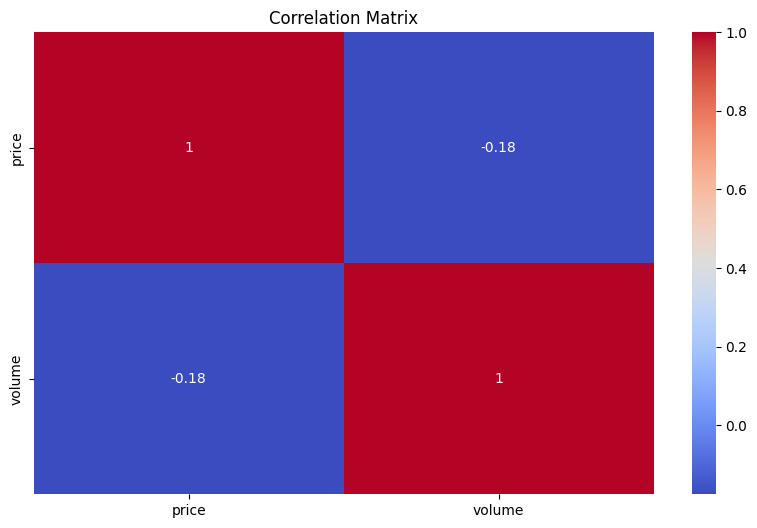

In [185]:
# Menghapus duplikasi
df = df.drop_duplicates()


# Mengisi nilai NaN dengan interpolasi
df['price'] = df['price'].interpolate(method='linear')
df['volume'] = df['volume'].interpolate(method='linear')

# Menambahkan kolom baru
df['price_to_volume_ratio'] = df['price_cleaned'] / df['volume_cleaned']

# Visualisasi heatmap
corr_matrix = df[['price', 'volume']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [188]:
df_cleaned = df.sort_values(by='date').reset_index(drop=True)
plt.figure(figsize=(12, 6))

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['price'], bins=30, kde=True, color='red', alpha=0.5, label='Original')
sns.histplot(df_cleaned['price_cleaned'], bins=30, kde=True, color='blue', alpha=0.5, label='Cleaned')
plt.title('Distribusi Harga: Original vs Cleaned')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['volume'], bins=30, kde=True, color='red', alpha=0.5, label='Original')
sns.histplot(df_cleaned['volume_cleaned'], bins=30, kde=True, color='blue', alpha=0.5, label='Cleaned')
plt.title('Distribusi Volume: Original vs Cleaned')
plt.xlabel('Volume')
plt.ylabel('Frekuensi')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='price_cleaned', y='volume_cleaned', alpha=0.7)
plt.title('Hubungan antara Harga dan Volume (Data Cleaned)')
plt.xlabel('Harga')
plt.ylabel('Volume')
plt.show()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_cleaned, x='date', y='price_cleaned', ci=None)
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Tren Harga dari Waktu ke Waktu (Data Cleaned)')
plt.xlabel('date')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='volume_cleaned', ci=None)
plt.title('Tren Volume dari Waktu ke Waktu (Data Cleaned)')
plt.xlabel('date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

KeyError: 'date'

In [160]:
# 8. Statistik deskriptif setelah pembersihan
print("\nStatistik deskriptif setelah pembersihan:")
print(df_cleaned[['price', 'price_cleaned', 'volume', 'volume_cleaned']].describe())



Statistik deskriptif setelah pembersihan:
             price  price_cleaned        volume  volume_cleaned
count  4401.000000    4401.000000  4.401000e+03    4.401000e+03
mean      3.398128       3.224944  2.011156e+07    1.137568e+07
std       2.633262       2.116766  7.471139e+07    1.204762e+07
min       0.070000       0.070000  6.000000e+02    6.000000e+02
25%       1.590000       1.590000  1.800000e+06    1.800000e+06
50%       3.100000       3.100000  7.100000e+06    7.100000e+06
75%       4.150000       4.150000  1.700000e+07    1.700000e+07
max      17.300000       7.990000  1.500000e+09    3.980000e+07


In [155]:
# 5. Boxplot untuk visualisasi outliers sebelum dan sesudah treatment
plt.figure(figsize=(16, 10))


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 0, 'Price')

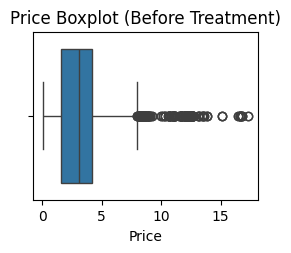

In [156]:
# Price boxplots
plt.subplot(2, 2, 1)
sns.boxplot(x=df_cleaned['price'])
plt.title('Price Boxplot (Before Treatment)')
plt.xlabel('Price')

Text(0.5, 0, 'Price (Cleaned)')

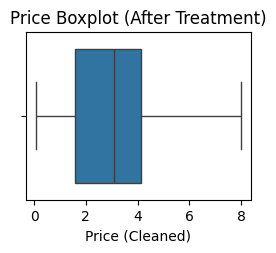

In [157]:
plt.subplot(2, 2, 2)
sns.boxplot(x=df_cleaned['price_cleaned'])
plt.title('Price Boxplot (After Treatment)')
plt.xlabel('Price (Cleaned)')

Text(0.5, 0, 'Volume')

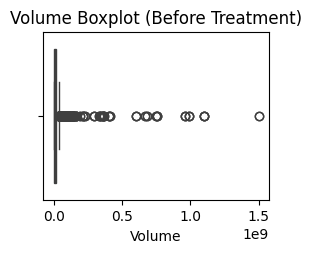

In [158]:
# Volume boxplots
plt.subplot(2, 2, 3)
sns.boxplot(x=df_cleaned['volume'])
plt.title('Volume Boxplot (Before Treatment)')
plt.xlabel('Volume')

Text(0.5, 0, 'Volume (Cleaned)')

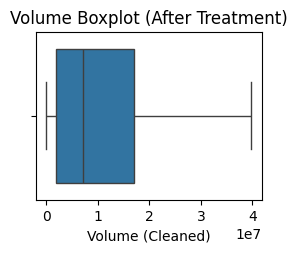

In [159]:
plt.subplot(2, 2, 4)
sns.boxplot(x=df_cleaned['volume_cleaned'])
plt.title('Volume Boxplot (After Treatment)')
plt.xlabel('Volume (Cleaned)')

In [ ]:
df.isnull().sum()

name                 0
price              149
date              4550
volume             149
price_cleaned      149
volume_cleaned     149
dtype: int64

In [164]:
df_cleaned.isnull().sum()

name                 0
price              149
date              4550
volume             149
price_cleaned      149
volume_cleaned     149
dtype: int64